# 5. Binary Image Processing

많은 컴퓨터 비전 작업에서 이진 이미지를 처리해야합니다. 이진 이미지는 완전 검정 (픽셀 값 0) 또는 완전 흰색 (픽셀 값 255) 인 픽셀로 구성됩니다. <br>
이 섹션에서는 다음과 같은 네 가지 이진 이미지 처리 알고리즘을 고려할 것입니다.

1. **Thresholding** : garyscale 이미지에서 이진 이미지를 만드는 데 사용됩니다.
2. **Dilation** : 바이너리 이미지에서 얼룩 크기를 확장하는 데 사용됩니다.
3. **Erosion** : 바이너리 이미지에서 얼룩 (연결된 픽셀 그룹)의 크기를 축소하는 데 사용됩니다.
4. **Morphological Opening/Closing** : 바이너리 이미지에서 얼룩을 삭제 하는 데 사용됩니다.
4. **Connected Component Analysis** : 바이너리 이미지에 얼룩을 표시하는 데 사용됩니다.

## 1. Thresholding

Thresholding은 회색조 이미지를 픽셀의 강도를 기반으로 이진 이미지로 변환하는 간단한 작업입니다.

<img src="nb_images/5.1.original_threshold.png" style="width:1000px;height:500;">

왼쪽 이미지는 숫자 자체와 동일한 강도 (그레이 스케일 값)로 작성된 숫자가 들어 있습니다. 
예를 들어 200의 픽셀 값은 200이고, 32의 픽셀 값은 32 입니다.
이 때 5 와 32 등의 그레이 스케일 값이 작은 숫자는 보이지 않습니다.

반면 오른쪽 Thresholded 이미지를 보면 모든 숫자가 보입니다.

Thresholded 이미지에서 숫자를 읽는 것은 원래 이미지에서 숫자를 읽는 것보다 훨씬 쉽습니다. 또한 Text recognition 알고리즘에서도 Threshold 처리가 된 이미지를 좀 더 잘 처리합니다.

모든 Thresholding 알고리즘은 Source(src) 이미지 및 Threshold 값을 입력으로 취해 Source 픽셀 (x, y)의 픽셀 값을 임계 값과 비교하여 출력 이미지 Destination(dst)을 생성합니다.

만약 src(x, y) > thresh 이면 dst(x, y)에 어떤 값(ex. 255)을 할당해 주면 됩니다. 만약 그렇지 않으면 또 다른 값(ex. 0)을 할당해 주면 됩니다.

Thresholding의 가장 간단한 형태는 Binary Thresholding입니다. 좀 더 자세히 설명하면 소스 이미지 (src) 및 임계 값 (thresh) 이외에 최대 값 (maxValue)이라는 또 다른 입력 매개 변수가 필요합니다. 각 픽셀 위치 (x, y)에서 픽셀 값 src (x, y)를 thresh와 비교합니다. src (x, y)가 thresh보다 큰 경우 대상 이미지 픽셀 dst (x, y)의 값을 maxValue로 설정하고, 그렇지 않으면 0으로 설정합니다.

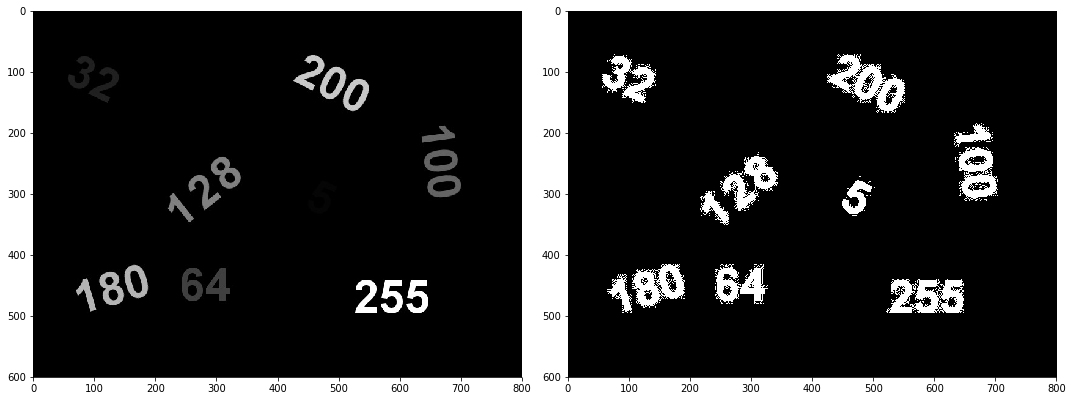

In [2]:
# Import OpenCV
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Read an image in grayscale
src = cv2.imread("images/5.1. Threshold_original.jpg", cv2.IMREAD_GRAYSCALE)

# Set threshold and manimum value
thresh = 0
maxValue = 255

# Binary threshold
th, dst = cv2.threshold(src, thresh, maxValue, cv2.THRESH_BINARY)

# Display images
f, axs = plt.subplots(1,2, figsize=(15,15))
plt.subplot(121)
plt.imshow(src, cmap = 'gray')
plt.subplot(122)
plt.imshow(dst, cmap = 'gray')
plt.tight_layout()
plt.show()

## 2. Dilation

binary image의 Dilation(확장)은 이미지 경계에서 이미지를 확장하는 데 사용됩니다.

In [3]:
# Import OpenCV
import cv2
import matplotlib.pyplot as plt

아래 코드는 이미지 디렉토리에서 이미지를 읽어 'NumPy 배열 이미지'에 저장 한 다음 이미지에서 확장 작업을 수행합니다. 마지막으로 Dilated 이미지는 'Numpy array imageDilated'에 저장됩니다. 결국 두 이미지가 모두 표시됩니다.

In [4]:
image = cv2.imread('images/5.2.original.png', cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

if image is None:
    print("Could not open or find the image")

확장 작업에 사용되는 커널 / 구조 요소를 만듭니다.
이 때 사용되는 함수로 [getStructuringElemnt](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#getstructuringelement)가 사용됩니다.

In [22]:
# Get Structuring element/kernel which will be used for dilation
dilationSize = 2
element = cv2.getStructuringElement(cv2.MORPH_CROSS,
                                    (2*dilationSize + 1,2*dilationSize + 1  ),
                                    (dilationSize, dilationSize))

In [23]:
print(element)

[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


dilation을 하려면 [cv2.dilate](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=dilate#cv2.dilate) 함수를 이용해야 합니다.

In [7]:
# Dilating the image, makes the image brighter
imageDilated = cv2.dilate(image, element)

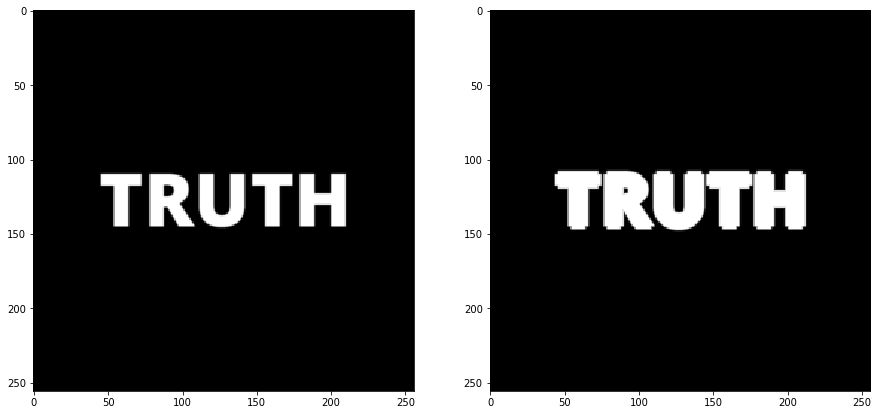

In [8]:
f, axs = plt.subplots(1,2, figsize=(15,15))

plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(imageDilated)
plt.show()

# 3. Erosion

binary image의 Erosion(침식)은 이미지 경계에서 이미지를 축소하는 데 사용됩니다.

In [9]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
image = cv2.imread("images/5.2.original.png", cv2.IMREAD_COLOR)
# Check for invalid input
if image is None:
    print("Could not open or find the image")

침식 작업에 사용되는 커널 / 구조 요소를 만듭니다.

In [11]:
# Get structuring element/kernel which will be used for erosion
erosionSize = 2
element = cv2.getStructuringElement(cv2.MORPH_CROSS,
                                    (2*erosionSize+1, 2*erosionSize+1),
                                    (erosionSize, erosionSize))

In [12]:
# Eroding the image, decreases brightness of image
imageEroded = cv2.erode(image, element)

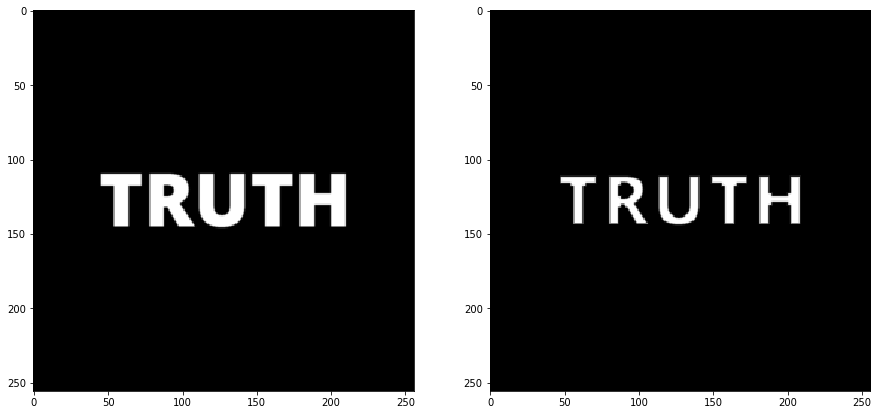

In [13]:
f, axis = plt.subplots(1, 2, figsize = (15, 15))

plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(imageEroded)
plt.show()

# 4. Morphological Opening/Closing

Dilation과 Erosion 작업은 종종 흥미로운 결과를 얻기 위해 결합됩니다. 예를 들어, 작은 얼룩은 침식과 팽창을 수행하여 제거 할 수 있습니다. 이 작업은 **morphological opening**이라고도합니다.

In [14]:
# Import OpenCV and numpy 
import cv2
# Image taken as input
image = cv2.imread("images/morphological_opening.png", cv2.IMREAD_GRAYSCALE)

# Check for invalid input
if image is None:  
    print("Could not open or find the image")

In [15]:
# Get structuring element/kernel which will be used for opening operation
openingSize = 3

# Selecting a elliptical kernel
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,
                                    (2 * openingSize + 1, 2 * openingSize + 1),
                                    (openingSize,openingSize))

morphologyEx 함수를 사용하고 MORPH_OPEN 태그를 지정하여 이미지에 Erosion을 적용한 후 Dilation을 적용합니다 (여는 작업을 나타냄).어떤 경우에는 한 번 이상 특정 형태 조작을 구현해야 할 수도 있습니다. 이 경우 필요한 반복 횟수를 정의해야합니다. 아래 코드에서는 반복 횟수를 3번 지정하였습니다. 아래 사용된 작은 원의 경우 Morphology Opening을 통하여 (Erosion → Dilation) 삭제된 것을 볼 수 있습니다.

In [16]:
imageMorphOpened = cv2.morphologyEx(image, cv2.MORPH_OPEN, element,iterations=3)

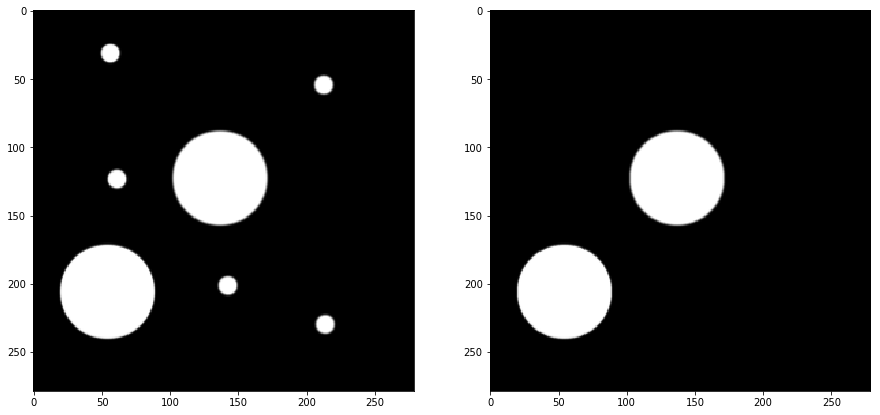

In [17]:
f, axis = plt.subplots(1, 2, figsize = (15, 15))

plt.subplot(121)
plt.imshow(image, cmap = 'gray')
plt.subplot(122)
plt.imshow(imageMorphOpened, cmap = 'gray')
plt.show()

반대로 Morphological Closing을 적용하려면 Morphological Opening 적용 함수에서 옵션을 바꾸면 됩니다. Morphological Opening 에서는 전체적으로 어두운 이미지에 작은 밝은 부분을 제거하는 것이었습니다. 반대로 Morphological Closing에서는 전체적으로 밝은 이미지에서 어두운 부분을 제거하는 것입니다.

In [29]:
import cv2
import numpy as np
image = cv2.imread('images/morphological_closing.png', cv2.IMREAD_GRAYSCALE)

# Check for invalid input
if image is None:
    print("Could not open or find the image")    

Closing Operation에 사용 될 Kernel/Structuring 을 생성하겠습니다. Kernel을 생성할 때에는 사이즈를 명시해 주어야 합니다.

In [30]:
# Get structuring element/kernel which will be used for closing operation
closingSize = 10

# Selecting an elliptical kernel
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*closingSize + 1, 2 * closingSize +1),
                                    (closingSize, closingSize))       

그 다음으로 morphologyEx 함수와 옵션으로 MORPH_CLOSE를 사용하여 Dilation → Erosion을 차례로 적용합니다.

In [31]:
imageMorphClosed = cv2.morphologyEx(image, cv2.MORPH_CLOSE, element)

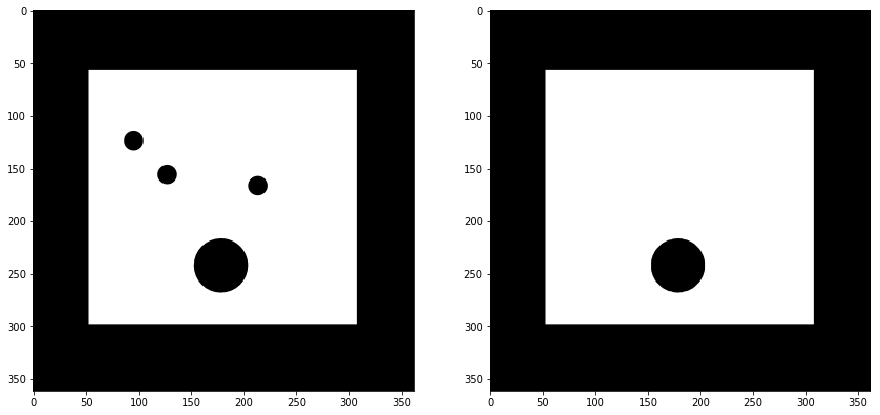

In [32]:
f, axis = plt.subplots(1, 2, figsize = (15, 15))

plt.subplot(121)
plt.imshow(image, cmap = 'gray')
plt.subplot(122)
plt.imshow(imageMorphClosed, cmap = 'gray')
plt.show()

# 5. Connected Component Analysis

이 섹션에서는 CCA (Connected Component Analysis)라는 간단한 컴퓨터 비전 알고리즘에 대해 설명하겠습니다. CCA는 이진 이미지에서 blob (연결 구성 요소라고도 함)의 수를 계산하는데도 사용할 수 있습니다. 예제를 통해 이해할 수 있습니다.

![2](nb_images/5.2.CCA1.PNG)
![3](nb_images/5.3.CCA2.PNG)

위의 그림에서 문자 T, R, U, T 및 H에 해당하는 5 개의 blob이있는 이진 이미지를 볼 수 있습니다. CCA (Connected Component Analysis)를 사용하면 모든 blob에 레이블을 적용 할 수 있습니다.
즉, CCA는 배경에 대응하는 모든 픽셀이 0이고, 첫 번째 블롭 (즉, 문자 T)에 대응하는 모든 픽셀이 1이고, R에 대응하는 픽셀이 2 등인 마스크를 생성 할 것이다.

[위키피디아](https://en.wikipedia.org/wiki/Connected-component_labeling)

In [1]:
import cv2
import numpy as np

1. 먼저, 이미지 픽셀 값을 0에서 255로 Normalization합니다. <br>
이를 수행하기 위해 먼저 이미지에서 최소 및 최대 값을 찾습니다. 전체 픽셀 값에 최소값 만큼을 다 뺸 다음 (최대 - 최소)로 나누어 이미지를 Normalization합니다. 이것은 이미지를 0에서 1 사이의 값으로 Normalization합니다. 마지막으로 255를 곱하여 0에서 255 사이의 값을 가진 이미지를 얻습니다. <br>

2. 컬러 맵을 적용하여 디스플레이 목적으로 그레이 스케일 값을 컬러로 변환합니다.

In [10]:
def displayConnectedComponets(im):
    imLabels = im
    
    # The following line finds the min and max pixel values
    # and their locations in an image.
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(imLabels)
    
    # Normalize the image so the min value is 0 and max value is 255.
    imLabels = 255 * (imLabels - minVal) / (maxVal - minVal)
    
    # Convert image to 8-bits unsigned type
    imLabels = np.uint8(imLabels)
    
    # Apply a color map
    imColorMap = cv2.applyColorMap(imLabels, cv2.COLORMAP_JET)
    
     # Display colormapped labels
    cv2.imshow("Labels", imColorMap)
    cv2.waitKey(0)

아래의 코드에서 이미지를 읽고 임계 값으로 바이너리 이미지를 만들고 opencv 함수 connectedComponents를 사용하여 label blob을 수행합니다. 사용법은 아래와 같습니다.

    _, labels = cv2.connectedComponents(image)
    
    image : binary image
    labels : label을 포함하는 output image

In [3]:
# Read image as grayscale
image = cv2.imread("images/5.5.CCA.png", cv2.IMREAD_GRAYSCALE)

# Threshold Image
th, imThresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Find connected components
_, imLabels = cv2.connectedComponents(imThresh)

# Display the labels
displayConnectedComponets(imLabels)